In [1]:
import torch
!pip install torchsummary
from torchsummary import summary
import torch.optim as optim
import sys
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
!rm -rf '/content/drive/MyDrive/colab_notebooks/S7/__pycache__'
!ls -lrt '/content/drive/MyDrive/colab_notebooks/S7/'

total 12
-rw------- 1 root root 1175 Jan 20 12:13 train_test_loader.py
-rw------- 1 root root  987 Jan 20 12:13 train.py
-rw------- 1 root root 1136 Jan 20 12:13 test.py
-rw------- 1 root root 2801 Jan 20 12:13 model.py
-rw------- 1 root root  572 Jan 20 12:13 loss_accuracy.py
drwx------ 2 root root 4096 Jan 20 12:32 data


In [4]:
os.chdir('./drive/MyDrive/colab_notebooks/S7/')

In [5]:
!ls

data  loss_accuracy.py	model.py  test.py  train.py  train_test_loader.py


In [6]:
import train_test_loader as ttl
import model as mdl
import train as trn
import test as tst
import loss_accuracy as lsac

In [7]:
def main(classes):

  train_loader, test_loader = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = mdl.Net().to(device)
  summary(model, input_size=(3, 32, 32))
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  EPOCHS=25
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer, epoch=EPOCHS)
      test_losses,test_acc=tst.test(model, device, test_loader)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  lsac.plot_acc_loss(test_loss,test_accuracy)
  print(test_loss)
  print(test_accuracy)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]             288
      BatchNorm2d-11           [-1, 32, 16, 16]              64
             ReLU-12           [-1, 32, 16, 16]               0
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

Loss=1.1601393222808838 Batch_id=390 Accuracy=49.16: 100%|██████████| 391/391 [00:16<00:00, 23.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2374, Accuracy: 5473/10000 (54.73%)

EPOCH: 2


Loss=1.0081623792648315 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0279, Accuracy: 6296/10000 (62.96%)

EPOCH: 3


Loss=0.9726260900497437 Batch_id=390 Accuracy=71.13: 100%|██████████| 391/391 [00:16<00:00, 24.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8716, Accuracy: 6910/10000 (69.10%)

EPOCH: 4


Loss=0.6492418646812439 Batch_id=390 Accuracy=74.29: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7806, Accuracy: 7267/10000 (72.67%)

EPOCH: 5


Loss=0.7103186845779419 Batch_id=390 Accuracy=75.75: 100%|██████████| 391/391 [00:15<00:00, 24.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7235, Accuracy: 7453/10000 (74.53%)

EPOCH: 6


Loss=0.6653572916984558 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:15<00:00, 24.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6748, Accuracy: 7628/10000 (76.28%)

EPOCH: 7


Loss=0.60397869348526 Batch_id=390 Accuracy=78.78: 100%|██████████| 391/391 [00:16<00:00, 24.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6904, Accuracy: 7567/10000 (75.67%)

EPOCH: 8


Loss=0.5024768114089966 Batch_id=390 Accuracy=79.75: 100%|██████████| 391/391 [00:15<00:00, 24.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6453, Accuracy: 7759/10000 (77.59%)

EPOCH: 9


Loss=0.5064736604690552 Batch_id=390 Accuracy=80.68: 100%|██████████| 391/391 [00:15<00:00, 25.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6424, Accuracy: 7728/10000 (77.28%)

EPOCH: 10


Loss=0.577422022819519 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:15<00:00, 25.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5707, Accuracy: 8019/10000 (80.19%)

EPOCH: 11


Loss=0.44353723526000977 Batch_id=390 Accuracy=82.03: 100%|██████████| 391/391 [00:15<00:00, 25.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5769, Accuracy: 8045/10000 (80.45%)

EPOCH: 12


Loss=0.49614009261131287 Batch_id=390 Accuracy=82.44: 100%|██████████| 391/391 [00:15<00:00, 25.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5705, Accuracy: 8035/10000 (80.35%)

EPOCH: 13


Loss=0.5596376657485962 Batch_id=390 Accuracy=83.09: 100%|██████████| 391/391 [00:15<00:00, 25.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5771, Accuracy: 8052/10000 (80.52%)

EPOCH: 14


Loss=0.5793136358261108 Batch_id=390 Accuracy=83.42: 100%|██████████| 391/391 [00:14<00:00, 26.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5670, Accuracy: 8017/10000 (80.17%)

EPOCH: 15


Loss=0.3731229603290558 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:15<00:00, 26.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5461, Accuracy: 8132/10000 (81.32%)

EPOCH: 16


Loss=0.5460208654403687 Batch_id=390 Accuracy=84.37: 100%|██████████| 391/391 [00:14<00:00, 26.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5381, Accuracy: 8157/10000 (81.57%)

EPOCH: 17


Loss=0.28898218274116516 Batch_id=390 Accuracy=84.52: 100%|██████████| 391/391 [00:14<00:00, 26.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5443, Accuracy: 8123/10000 (81.23%)

EPOCH: 18


Loss=0.43488389253616333 Batch_id=390 Accuracy=84.68: 100%|██████████| 391/391 [00:14<00:00, 27.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5232, Accuracy: 8179/10000 (81.79%)

EPOCH: 19


Loss=0.5159099102020264 Batch_id=390 Accuracy=85.13: 100%|██████████| 391/391 [00:14<00:00, 26.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5269, Accuracy: 8198/10000 (81.98%)

EPOCH: 20


Loss=0.43313097953796387 Batch_id=390 Accuracy=85.40: 100%|██████████| 391/391 [00:14<00:00, 26.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5082, Accuracy: 8246/10000 (82.46%)

EPOCH: 21


Loss=0.458094984292984 Batch_id=390 Accuracy=85.81: 100%|██████████| 391/391 [00:14<00:00, 26.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5325, Accuracy: 8208/10000 (82.08%)

EPOCH: 22


Loss=0.3622327148914337 Batch_id=390 Accuracy=85.81: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5023, Accuracy: 8269/10000 (82.69%)

EPOCH: 23


Loss=0.5525974035263062 Batch_id=390 Accuracy=86.11: 100%|██████████| 391/391 [00:14<00:00, 26.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5004, Accuracy: 8273/10000 (82.73%)

EPOCH: 24


Loss=0.3558877110481262 Batch_id=390 Accuracy=86.41: 100%|██████████| 391/391 [00:14<00:00, 27.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5031, Accuracy: 8265/10000 (82.65%)

EPOCH: 25


Loss=0.39072880148887634 Batch_id=390 Accuracy=86.63: 100%|██████████| 391/391 [00:14<00:00, 26.33it/s]



Test set: Average loss: 0.4901, Accuracy: 8341/10000 (83.41%)

[[1.2374016172409057], [1.0278982629299165], [0.8715553109169006], [0.7806413319587707], [0.7234507528305054], [0.6747736489295959], [0.6903704581737519], [0.6453321571350098], [0.6424494598388671], [0.57067685546875], [0.5769498428344727], [0.5705446686267853], [0.5771237051963806], [0.5670454907417297], [0.5460770558357239], [0.5380726286888122], [0.5442851211547851], [0.5232400855064392], [0.5269342673301697], [0.5081929862976075], [0.5325358702659607], [0.5023324902534485], [0.5004238718032837], [0.5030844841003418], [0.49014166412353516]]
[[54.73], [62.96], [69.1], [72.67], [74.53], [76.28], [75.67], [77.59], [77.28], [80.19], [80.45], [80.35], [80.52], [80.17], [81.32], [81.57], [81.23], [81.79], [81.98], [82.46], [82.08], [82.69], [82.73], [82.65], [83.41]]


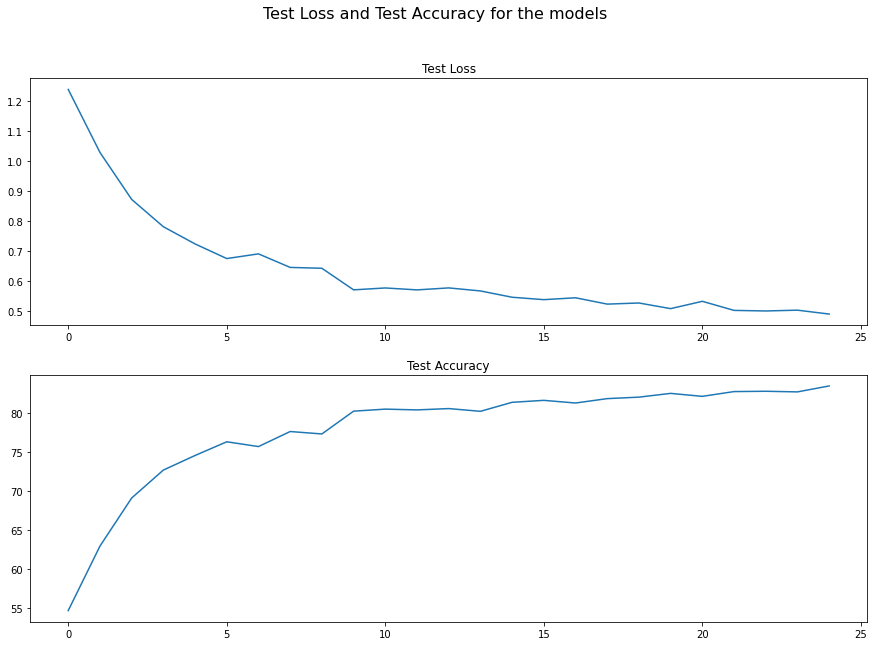

In [8]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)